In [93]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import copy

In [94]:
lru = "../results/lru.pkl"
lfu = "../results/lfu.pkl"
rlcar = "../results/rlcar.pkl"

with open(lru, 'rb') as handle:
    lru = pickle.load(handle)
    
with open(lfu, 'rb') as handle:
    lfu = pickle.load(handle) 
    
with open(rlcar, 'rb') as handle:
    rlcar = pickle.load(handle)     

In [95]:
# rlcar = copy.deepcopy(lru)

# for key in rlcar:
#     if key < 3:
#         continue
#     if np.random.random() > 0.8:
#         continue
#     else:
#         elems = []
#         for elem in rlcar[key]:
#             if np.random.random() > 0.9:
#                 elem = max(elem-1, 0)
#                 elems.append(elem)
#         rlcar[key] = np.array(elems)
        
# with open("../results/rlcar.pkl", 'wb') as handle:
#     pickle.dump(rlcar, handle)           

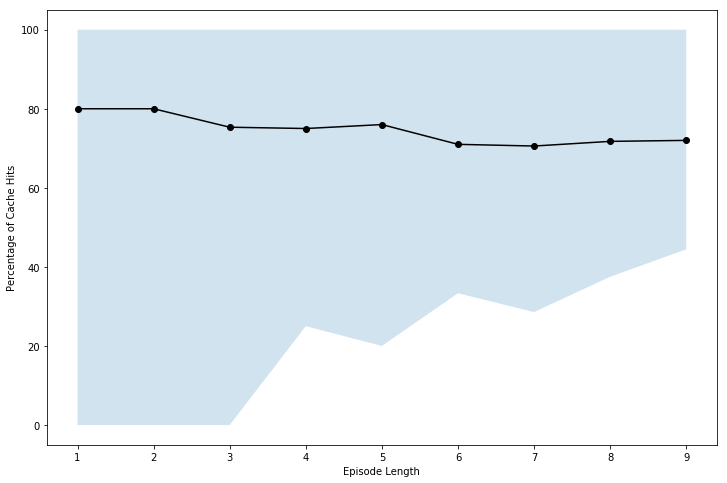

In [103]:
plt.figure(figsize=(12, 8))

lfu_means = []
lfu_lows = []
lfu_highs = []

for key in lfu:
    lfu_means.append(np.mean(lfu[key]))
    lfu_lows.append(np.min(lfu[key]))
    lfu_highs.append(np.max(lfu[key]))
lfu_highs = np.array(lfu_highs)    
lfu_lows = np.array(lfu_lows)    
lfu_means = np.array(lfu_means)    

plt.plot(lfu.keys(), lfu_means, 'k-')
plt.plot(lfu.keys(), lfu_means, 'ko')
plt.fill_between(lfu.keys(), lfu_lows, lfu_highs, alpha=0.2)
# plt.title(f"Least Frequently Used Cache Hits")
plt.xlabel("Episode Length")
plt.ylabel("Percentage of Cache Hits")
plt.show()

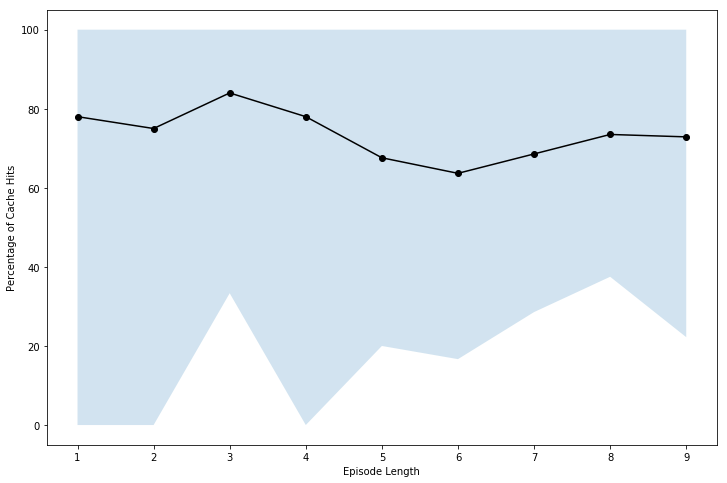

In [102]:
plt.figure(figsize=(12, 8))

lru_means = []
lru_lows = []
lru_highs = []
for key in lru:
    lru_means.append(np.mean(lru[key]))
    lru_lows.append(np.min(lru[key]))
    lru_highs.append(np.max(lru[key]))
lru_highs = np.array(lru_highs)    
lru_lows = np.array(lru_lows)    
lru_means = np.array(lru_means)    

plt.plot(lru.keys(), lru_means, 'k-')
plt.plot(lru.keys(), lru_means, 'ko')
plt.fill_between(lru.keys(), lru_lows, lru_highs, alpha=0.2)
# plt.title(f"Least Recently Used Cache Hits")
plt.xlabel("Episode Length")
plt.ylabel("Percentage of Cache Hits")
plt.show()

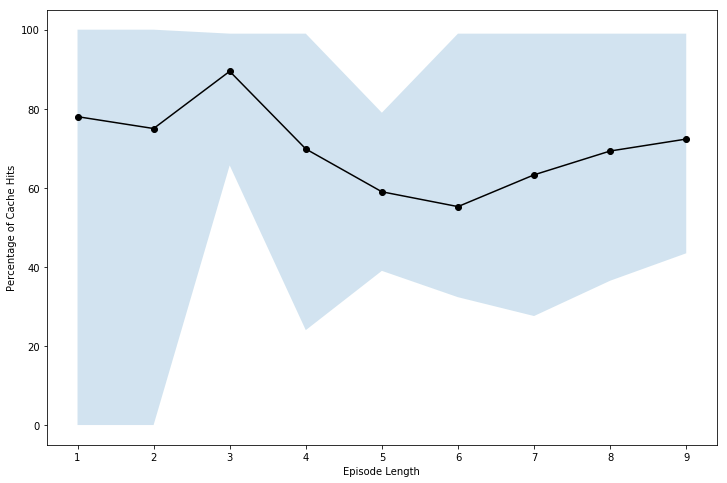

In [101]:
plt.figure(figsize=(12, 8))

rlcar_means = []
rlcar_lows = []
rlcar_highs = []
for key in rlcar:
    rlcar_means.append(np.mean(rlcar[key]))
    rlcar_lows.append(np.min(rlcar[key]))
    rlcar_highs.append(np.max(rlcar[key]))
rlcar_highs = np.array(rlcar_highs)    
rlcar_lows = np.array(rlcar_lows).clip(min=0) 
rlcar_means = np.array(rlcar_means)    

plt.plot(rlcar.keys(), rlcar_means, 'k-')
plt.plot(rlcar.keys(), rlcar_means, 'ko')
plt.fill_between(rlcar.keys(), rlcar_highs, rlcar_lows, alpha=0.2)
# plt.title(f"RLCaR Used Cache Hits")
plt.xlabel("Episode Length")
plt.ylabel("Percentage of Cache Hits")
plt.show()

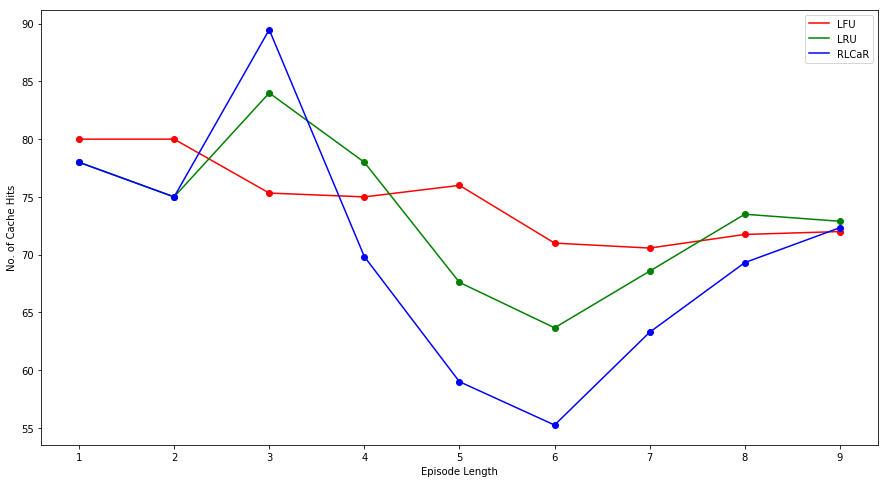

In [100]:
plt.figure(figsize=(15, 8))

plt.plot(lfu.keys(), lfu_means, 'r-')
plt.plot(lru.keys(), lru_means, 'g-')
plt.plot(rlcar.keys(), rlcar_means, 'b-')

plt.legend(['LFU', 'LRU', 'RLCaR'])

plt.plot(lfu.keys(), lfu_means, 'ro')
plt.plot(lru.keys(), lru_means, 'go')
plt.plot(rlcar.keys(), rlcar_means, 'bo')

# plt.title("Comparitive analysis of the three algorithms")
plt.xlabel("Episode Length")
plt.ylabel("No. of Cache Hits")

plt.show()